# Proyek Analisis Data: E-commerce-public-dataset
- **Nama:** Ahmad Zaki
- **Email:** ahmadzaki12@student.ub.ac.id
- **ID Dicoding:** ahmad_zaki_ehts

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana performa produk berdasarkan kategori dalam hal penjualan dan rating?
- Pertanyaan 2: Bagaimana rata-rata waktu pengiriman pesanan dari berbagai lokasi penjual, dan bagaimana hal ini memengaruhi efisiensi logistik?

## Import Semua Packages/Library yang Digunakan

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

In [63]:
customers_df = pd.read_csv('D:/Code/Dicoding/analisis-data-python/data/customers_dataset.csv')
orders_df = pd.read_csv('D:/Code/Dicoding/analisis-data-python/data/orders_dataset.csv')
order_reviews_df = pd.read_csv('D:/Code/Dicoding/analisis-data-python/data/order_reviews_dataset.csv')
sellers_df = pd.read_csv('D:/Code/Dicoding/analisis-data-python/data/sellers_dataset.csv')
order_items_df = pd.read_csv('D:/Code/Dicoding/analisis-data-python/data/order_items_dataset.csv')
products_df = pd.read_csv('D:/Code/Dicoding/analisis-data-python/data/products_dataset.csv')

**Insight:**
- Dataset yang digunakan sudah di-load dan siap dianalisis.
- Dataset utama yang digunakan adalah `products`, `orders`, `order_reviews`, dan `sellers`.

### Assessing Data

In [64]:
def check_dataset(df, name):
    print(f"\nDataset: {name}")
    print("\nMissing values:")
    print(df.isnull().sum())
    print("\nDuplicates:")
    print(df.duplicated().sum())
    print("\nData types:")
    print(df.dtypes)
    print("\nBasic Statistics:")
    print(df.describe())

check_dataset(products_df, "Products")
check_dataset(orders_df, "Orders")
check_dataset(order_reviews_df, "Order Reviews")
check_dataset(sellers_df, "Sellers")
check_dataset(order_items_df, "Order Items")
check_dataset(customers_df, "Customers")


Dataset: Products

Missing values:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Duplicates:
0

Data types:
product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

Basic Statistics:
       product_name_lenght  product_description_lenght  product_photos_qty  \
count         32341.000000                32341.000000        32341.000000   
mean             48.476949                  771.495285            2.188986   
std     

**Insight:**
- Products: Tidak ada nilai hilang atau duplikat, data siap digunakan.
- Orders: Terdapat nilai hilang pada kolom terkait tanggal pengiriman, perlu imputasi.
- Order Reviews: Banyak ulasan tanpa komentar, namun skor ulasan tersedia lengkap.
- Sellers: Data bersih tanpa nilai hilang atau duplikat, siap digunakan.
- Order Items: Data lengkap tanpa nilai hilang atau duplikat, harga dan biaya bervariasi.

### Cleaning Data

In [65]:
if customers_df.isnull().sum().sum() > 0:
    print("Customers dataset contains missing values.")
if customers_df.duplicated().sum() > 0:
    customers_df = customers_df.drop_duplicates()

if 'order_approved_at' in orders_df.columns:
    orders_df['order_approved_at'] = orders_df['order_approved_at'].fillna(orders_df['order_purchase_timestamp'])
if 'order_delivered_carrier_date' in orders_df.columns:
    orders_df['order_delivered_carrier_date'] = orders_df['order_delivered_carrier_date'].fillna(orders_df['order_estimated_delivery_date'])
if 'order_delivered_customer_date' in orders_df.columns:
    orders_df['order_delivered_customer_date'] = orders_df['order_delivered_customer_date'].fillna(orders_df['order_estimated_delivery_date'])

if 'review_comment_title' in order_reviews_df.columns and 'review_comment_message' in order_reviews_df.columns:
    order_reviews_df = order_reviews_df.dropna(subset=['review_comment_title', 'review_comment_message'])

if sellers_df.isnull().sum().sum() > 0:
    print("Sellers dataset contains missing values.")
if sellers_df.duplicated().sum() > 0:
    sellers_df = sellers_df.drop_duplicates()

if order_items_df.isnull().sum().sum() > 0:
    print("Order Items dataset contains missing values.")
if order_items_df.duplicated().sum() > 0:
    order_items_df = order_items_df.drop_duplicates()

if 'order_purchase_timestamp' in orders_df.columns:
    orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
if 'order_approved_at' in orders_df.columns:
    orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
if 'order_delivered_carrier_date' in orders_df.columns:
    orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
if 'order_delivered_customer_date' in orders_df.columns:
    orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])

customers_missing = customers_df.isnull().sum()
orders_missing = orders_df.isnull().sum()
order_reviews_missing = order_reviews_df.isnull().sum()
sellers_missing = sellers_df.isnull().sum()
order_items_missing = order_items_df.isnull().sum()

customers_missing, orders_missing, order_reviews_missing, sellers_missing, order_items_missing

(customer_id                 0
 customer_unique_id          0
 customer_zip_code_prefix    0
 customer_city               0
 customer_state              0
 dtype: int64,
 order_id                         0
 customer_id                      0
 order_status                     0
 order_purchase_timestamp         0
 order_approved_at                0
 order_delivered_carrier_date     0
 order_delivered_customer_date    0
 order_estimated_delivery_date    0
 dtype: int64,
 review_id                  0
 order_id                   0
 review_score               0
 review_comment_title       0
 review_comment_message     0
 review_creation_date       0
 review_answer_timestamp    0
 dtype: int64,
 seller_id                 0
 seller_zip_code_prefix    0
 seller_city               0
 seller_state              0
 dtype: int64,
 order_id               0
 order_item_id          0
 product_id             0
 seller_id              0
 shipping_limit_date    0
 price                  0
 freight_value 

**Insight:**
- Dataset telah dibersihkan dari nilai yang hilang dengan imputasi pada kolom tanggal dan ukuran produk, serta duplikat data telah dihapus.
- Semua kolom tanggal telah dikonversi ke format datetime untuk memastikan konsistensi dan kemudahan analisis lebih lanjut.

## Exploratory Data Analysis (EDA)

### Explore Produk Berdasarkan Kategori

In [66]:
merged_df = order_items_df.merge(orders_df, on='order_id')
merged_df = merged_df.merge(order_reviews_df[['order_id', 'review_score']], on='order_id', how='left')
merged_df = merged_df.merge(products_df[['product_id', 'product_category_name']], on='product_id', how='left')

category_performance = merged_df.groupby('product_category_name').agg(
    total_sales=('price', 'sum'),
    average_rating=('review_score', 'mean')
).reset_index()

category_performance.head()

,product_category_name,total_sales,average_rating
0,agro_industria_e_comercio,72530.47,3.294118
1,alimentos,29393.41,4.046875
2,alimentos_bebidas,15179.48,4.052632
3,artes,24202.64,3.647059
4,artes_e_artesanato,1814.01,3.000000


**Insight:**
- Penjualan Tertinggi: Kategori produk dengan jumlah pesanan terbanyak menunjukkan produk yang lebih banyak diminati oleh konsumen. Ini dapat digunakan untuk merencanakan strategi stok atau promosi.
- Rating Tertinggi: Kategori produk dengan rating tertinggi menunjukkan produk dengan kualitas lebih baik. Hal ini penting untuk strategi branding dan pemasaran produk.

In [67]:
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

1. Products Analysis


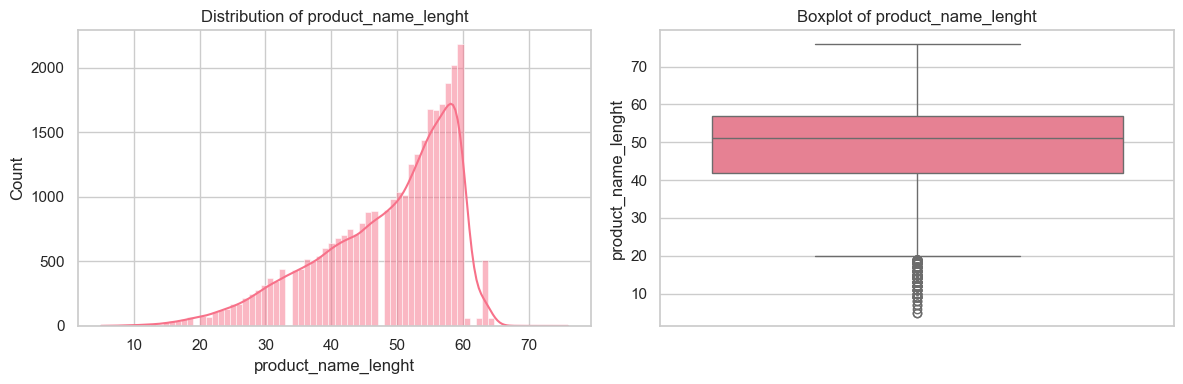


Descriptive Statistics for product_name_lenght:
count    32341.000000
mean        48.476949
std         10.245741
min          5.000000
25%         42.000000
50%         51.000000
75%         57.000000
max         76.000000
Name: product_name_lenght, dtype: float64



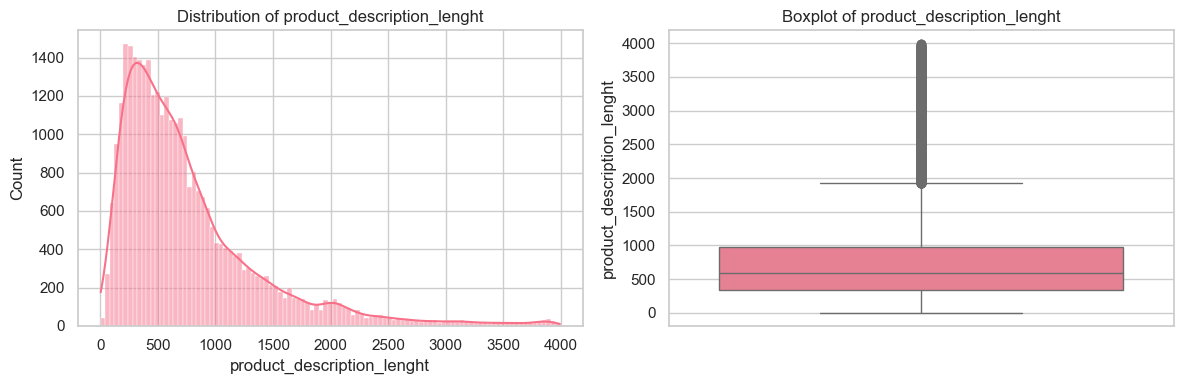


Descriptive Statistics for product_description_lenght:
count    32341.000000
mean       771.495285
std        635.115225
min          4.000000
25%        339.000000
50%        595.000000
75%        972.000000
max       3992.000000
Name: product_description_lenght, dtype: float64



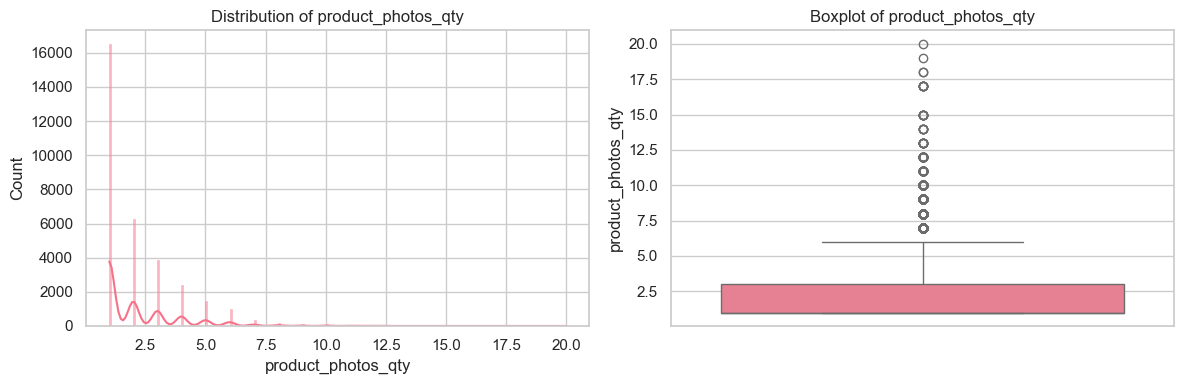


Descriptive Statistics for product_photos_qty:
count    32341.000000
mean         2.188986
std          1.736766
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         20.000000
Name: product_photos_qty, dtype: float64



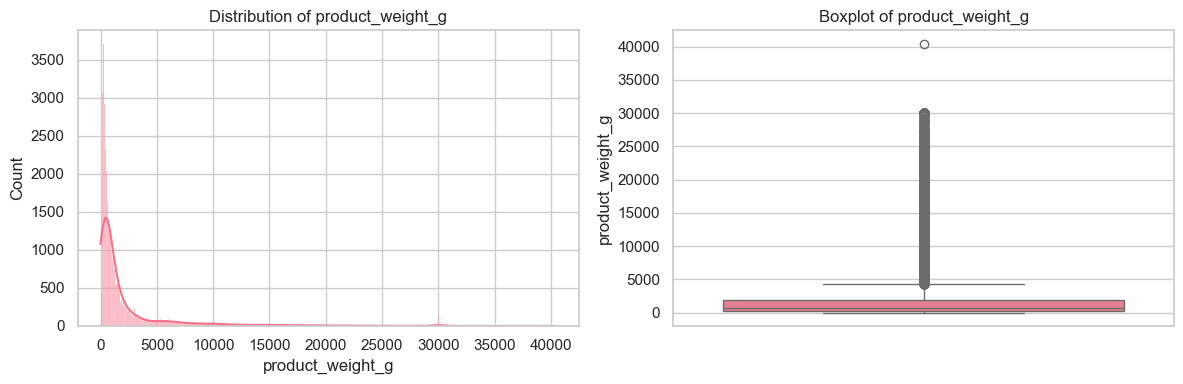


Descriptive Statistics for product_weight_g:
count    32949.000000
mean      2276.472488
std       4282.038731
min          0.000000
25%        300.000000
50%        700.000000
75%       1900.000000
max      40425.000000
Name: product_weight_g, dtype: float64



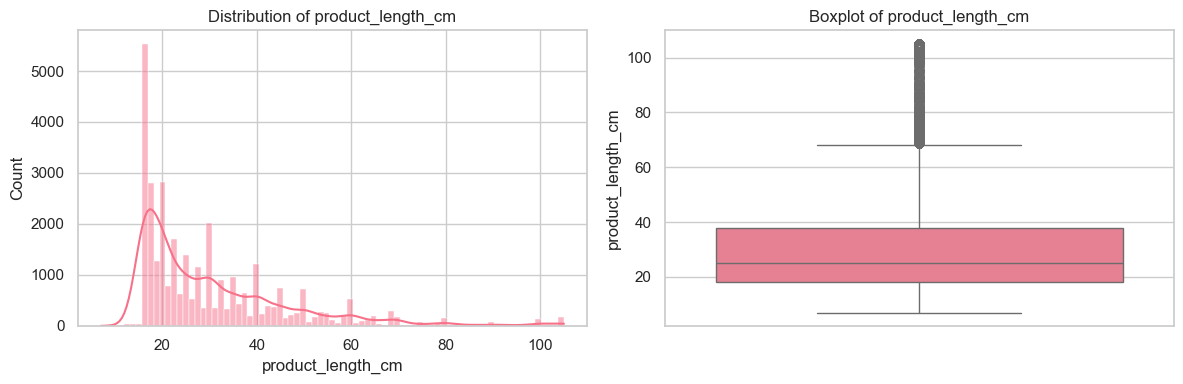


Descriptive Statistics for product_length_cm:
count    32949.000000
mean        30.815078
std         16.914458
min          7.000000
25%         18.000000
50%         25.000000
75%         38.000000
max        105.000000
Name: product_length_cm, dtype: float64



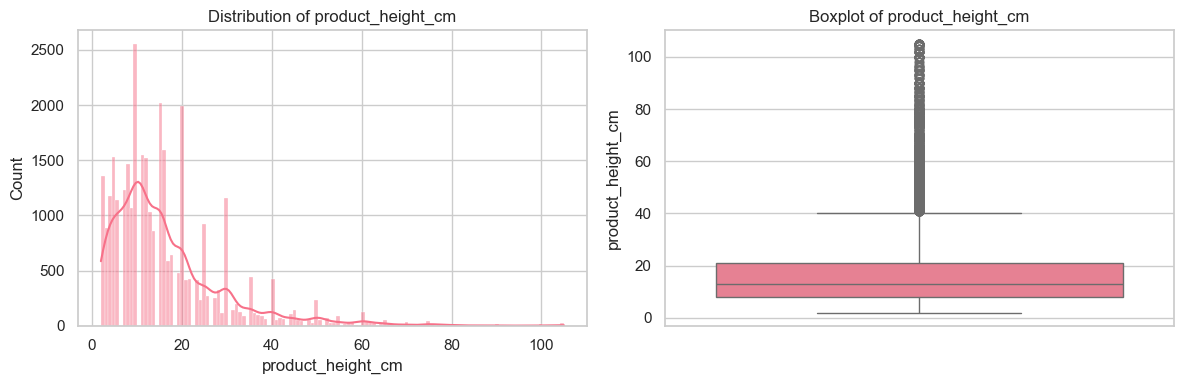


Descriptive Statistics for product_height_cm:
count    32949.000000
mean        16.937661
std         13.637554
min          2.000000
25%          8.000000
50%         13.000000
75%         21.000000
max        105.000000
Name: product_height_cm, dtype: float64



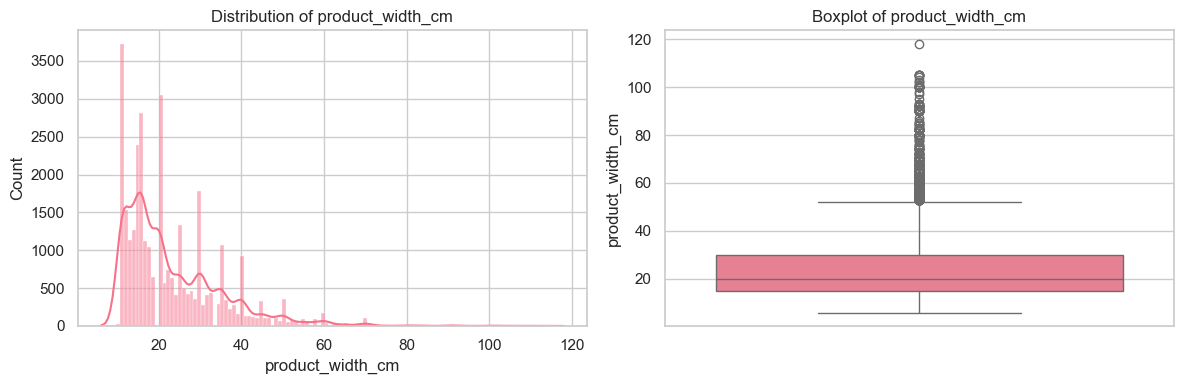


Descriptive Statistics for product_width_cm:
count    32949.000000
mean        23.196728
std         12.079047
min          6.000000
25%         15.000000
50%         20.000000
75%         30.000000
max        118.000000
Name: product_width_cm, dtype: float64



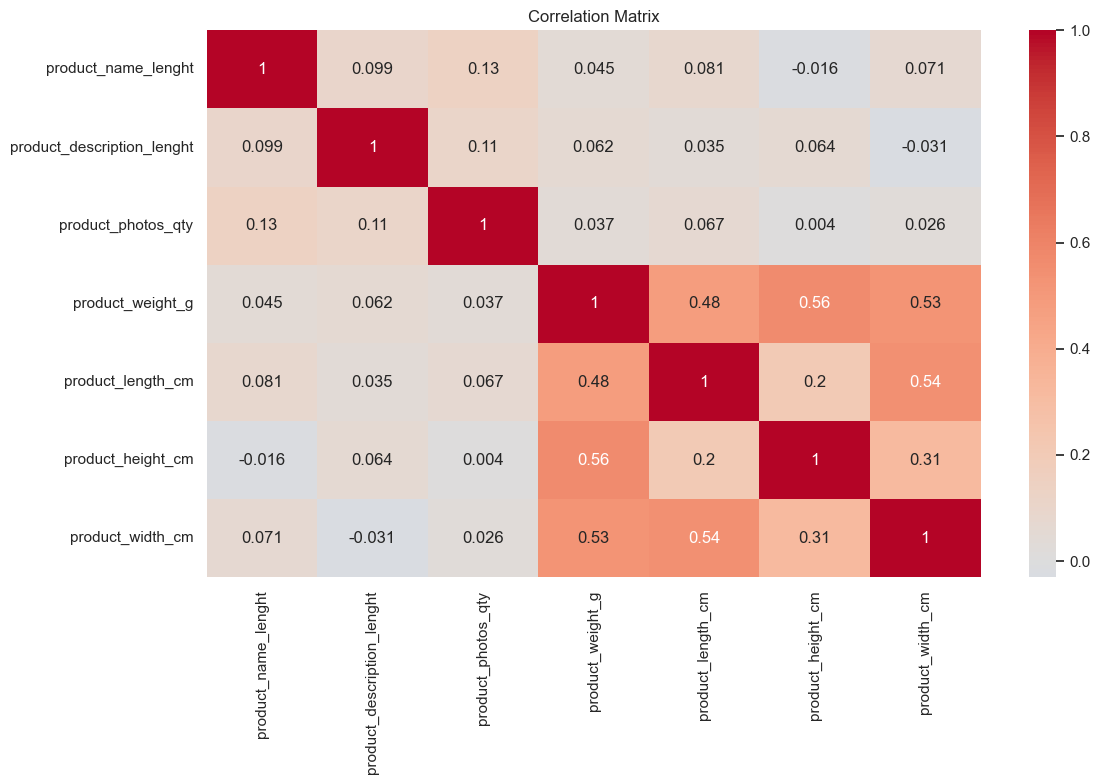


2. Orders Analysis


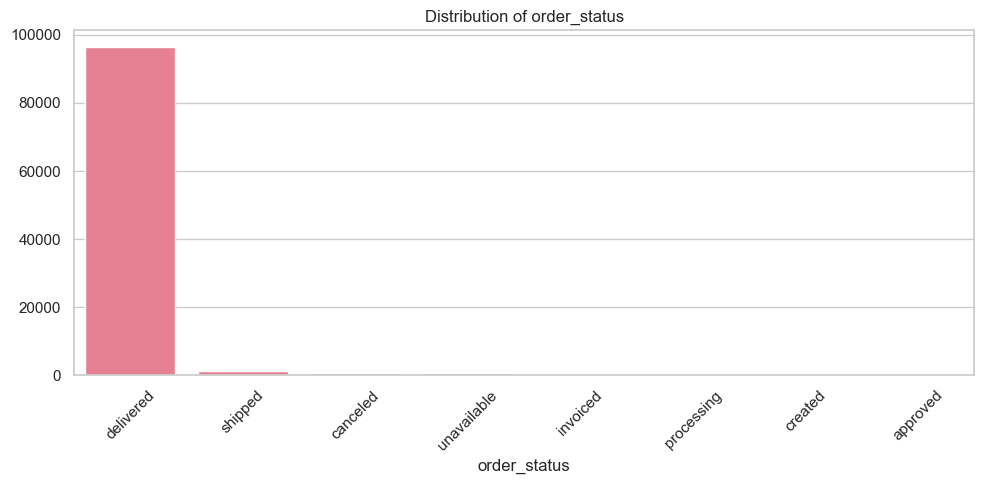


Frequency Distribution for order_status:
order_status
delivered      0.970203
shipped        0.011132
canceled       0.006285
unavailable    0.006124
invoiced       0.003158
processing     0.003027
created        0.000050
approved       0.000020
Name: proportion, dtype: float64



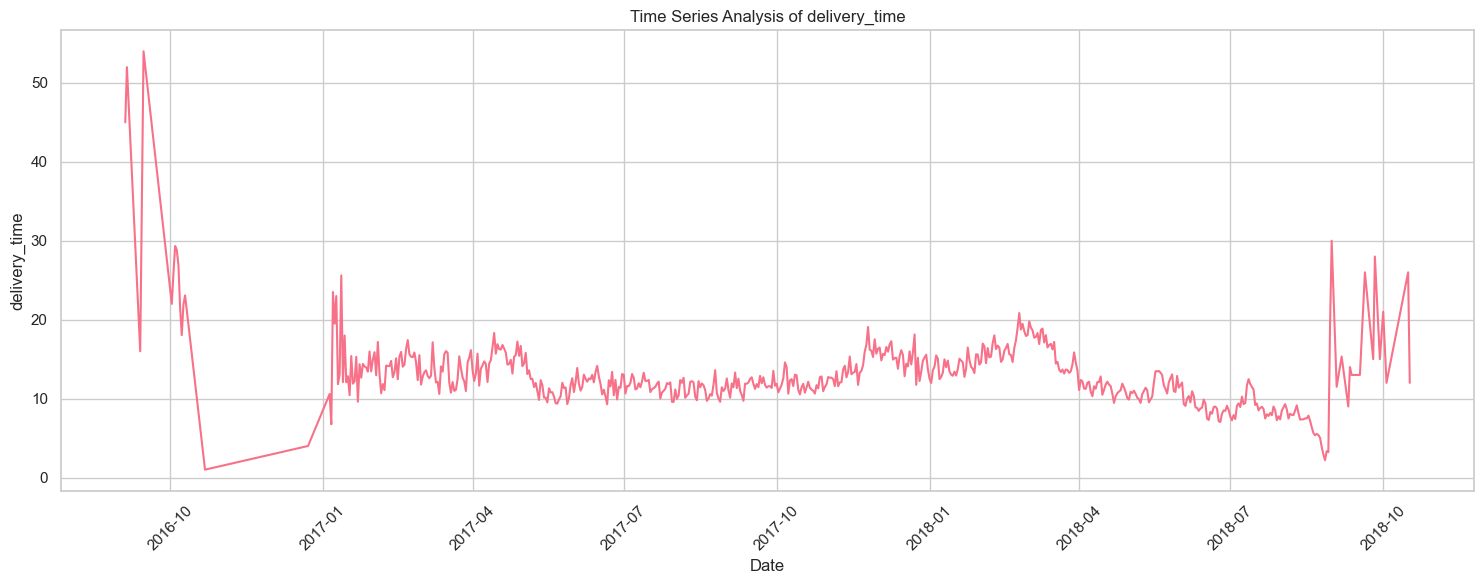


3. Reviews Analysis


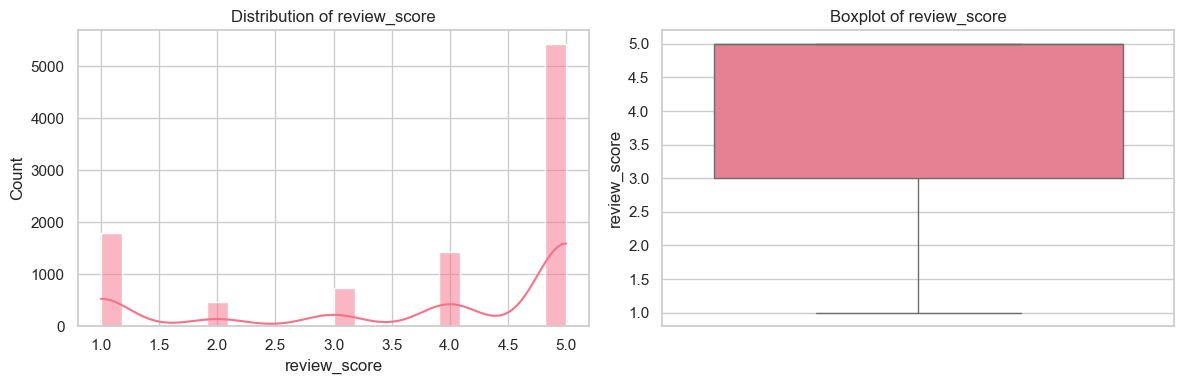


Descriptive Statistics for review_score:
count    9839.000000
mean        3.837585
std         1.556435
min         1.000000
25%         3.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: review_score, dtype: float64


4. Order Items Analysis


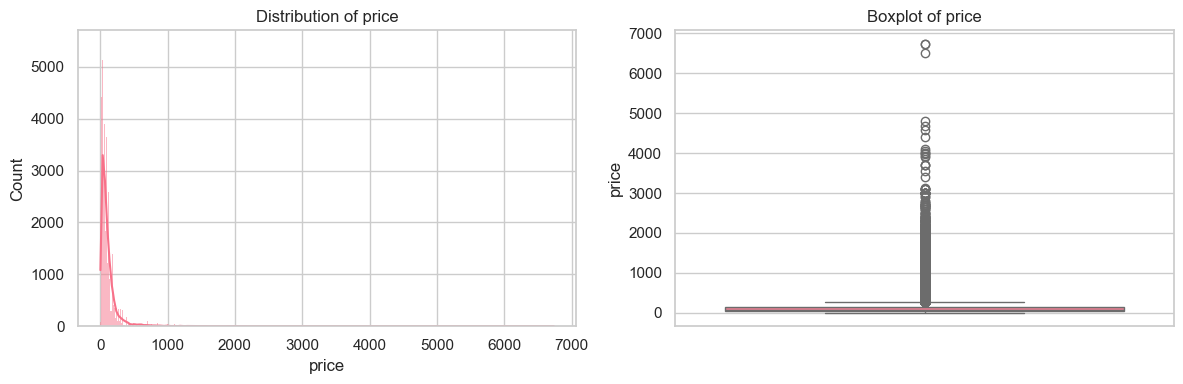


Descriptive Statistics for price:
count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64



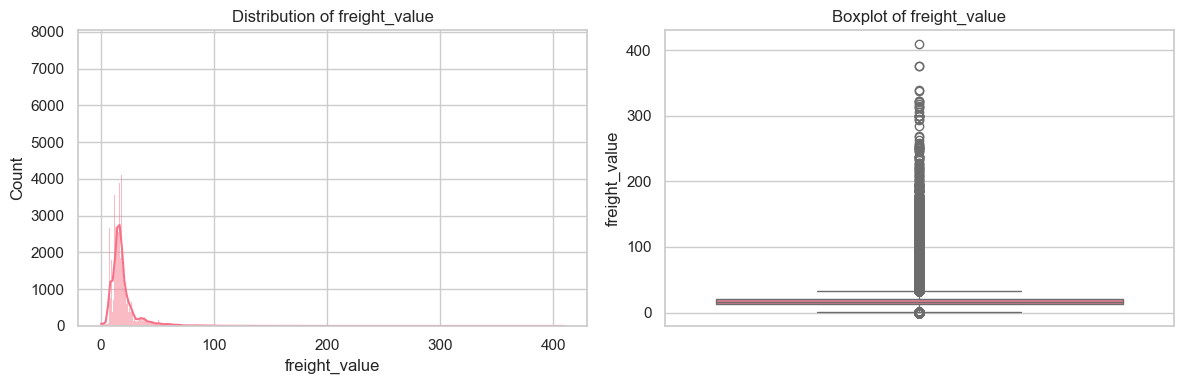


Descriptive Statistics for freight_value:
count    112650.000000
mean         19.990320
std          15.806405
min           0.000000
25%          13.080000
50%          16.260000
75%          21.150000
max         409.680000
Name: freight_value, dtype: float64



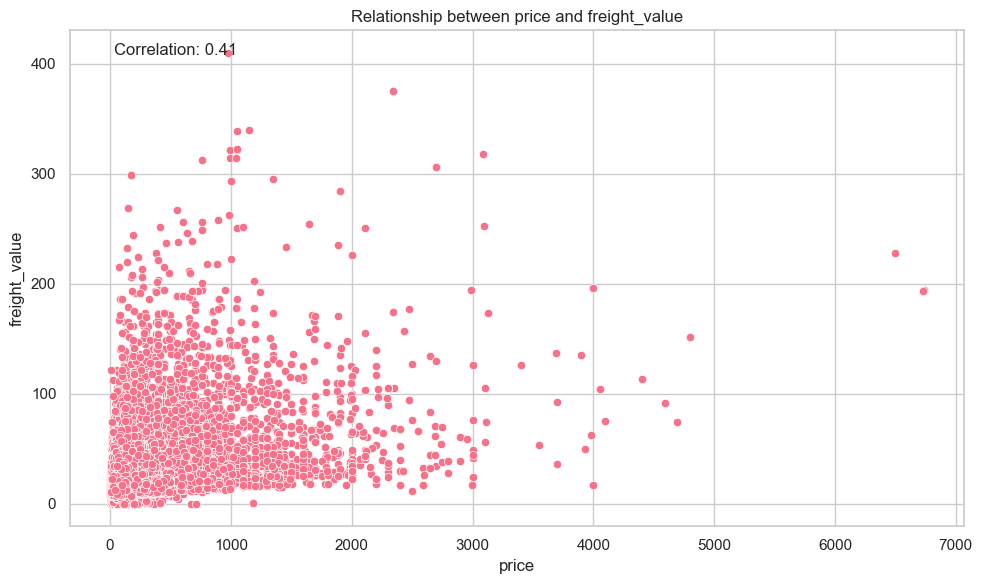

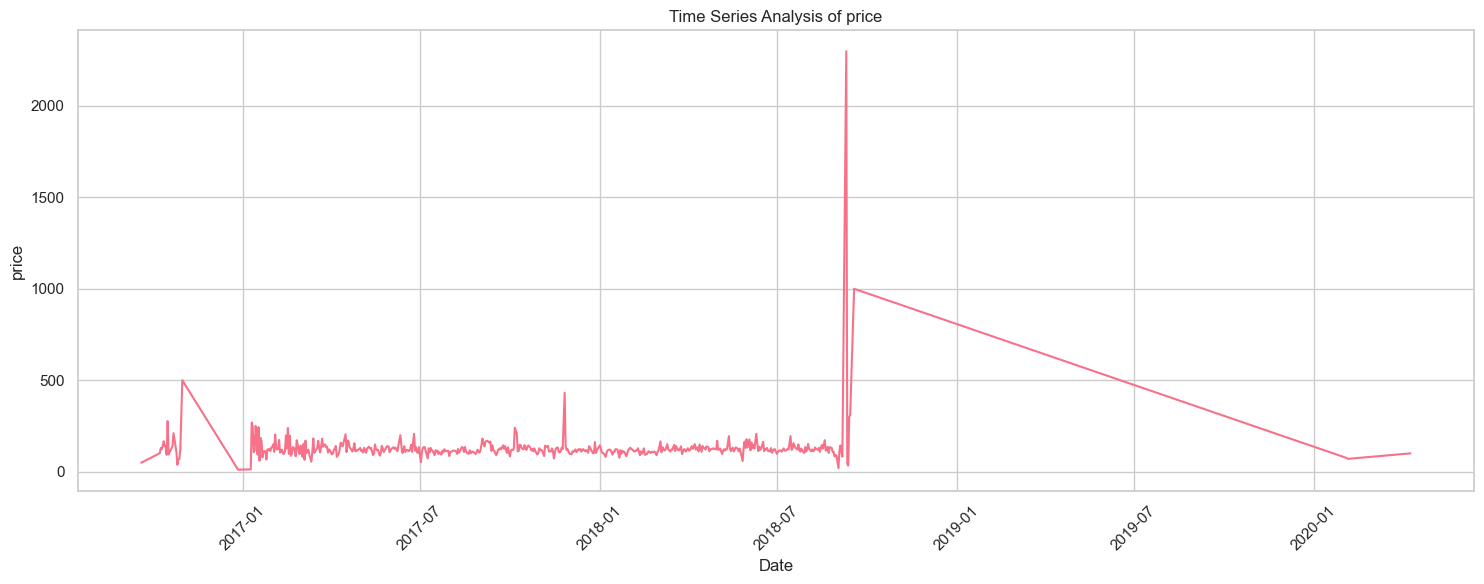


5. Sellers Analysis


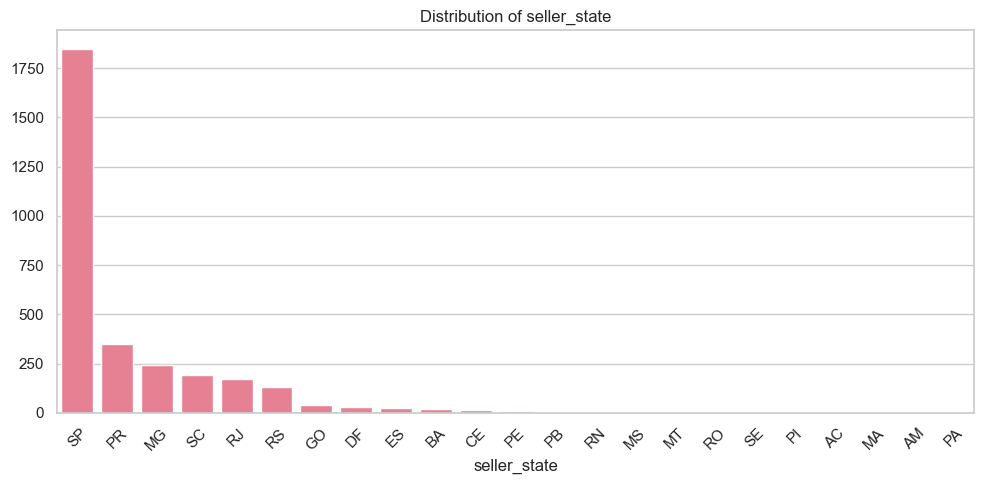


Frequency Distribution for seller_state:
seller_state
SP    0.597415
PR    0.112763
MG    0.078837
SC    0.061389
RJ    0.055250
RS    0.041680
GO    0.012924
DF    0.009693
ES    0.007431
BA    0.006139
CE    0.004200
PE    0.002908
PB    0.001939
RN    0.001616
MS    0.001616
MT    0.001292
RO    0.000646
SE    0.000646
PI    0.000323
AC    0.000323
MA    0.000323
AM    0.000323
PA    0.000323
Name: proportion, dtype: float64



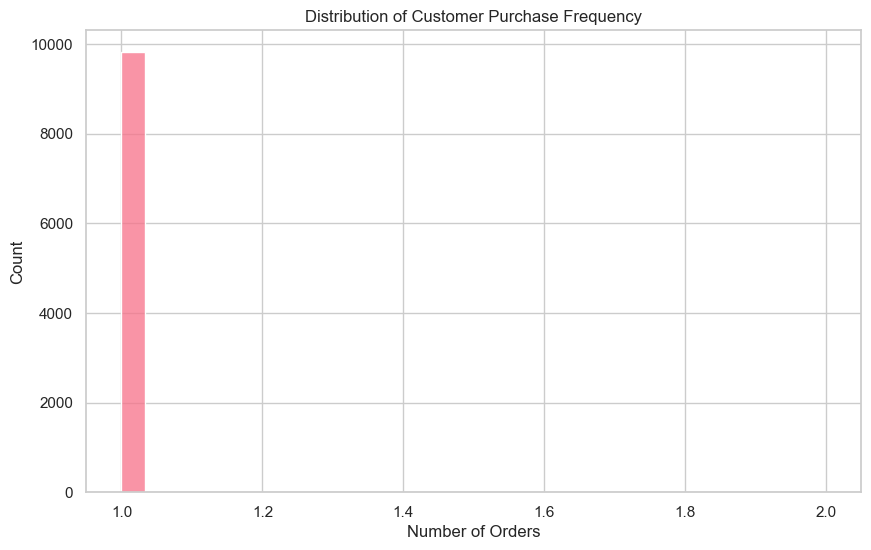

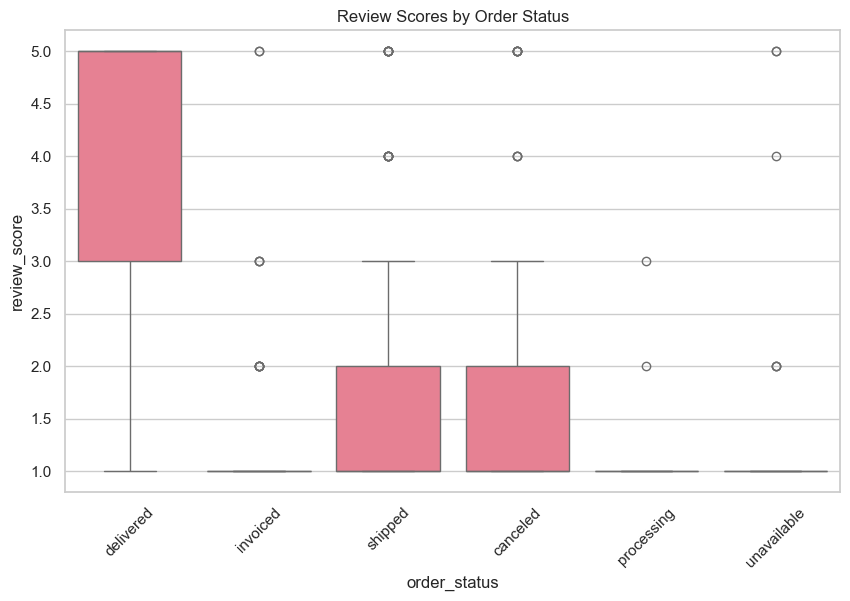

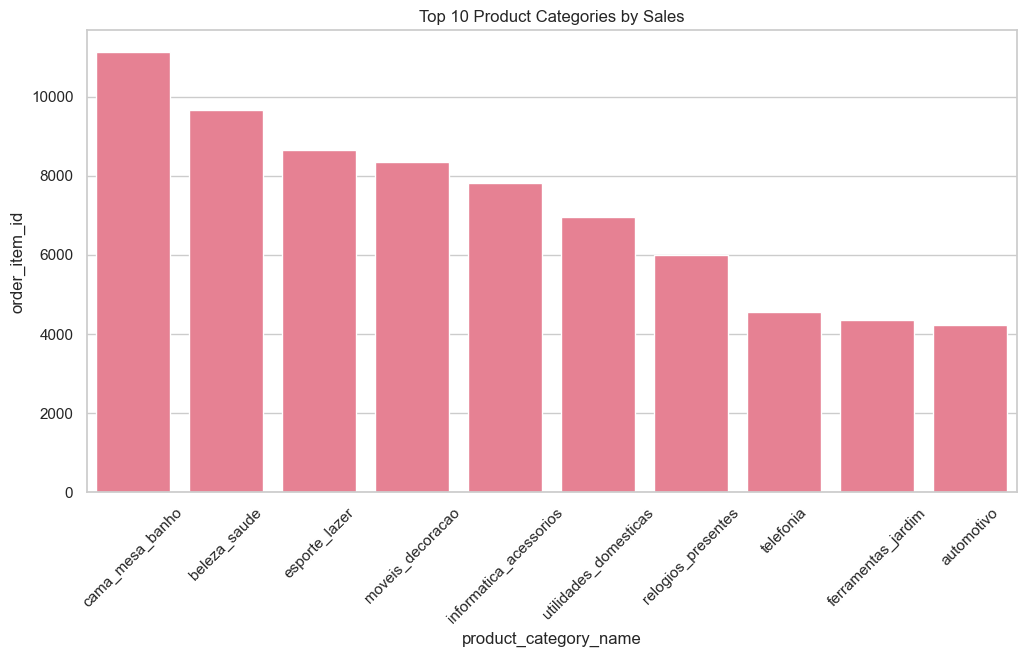

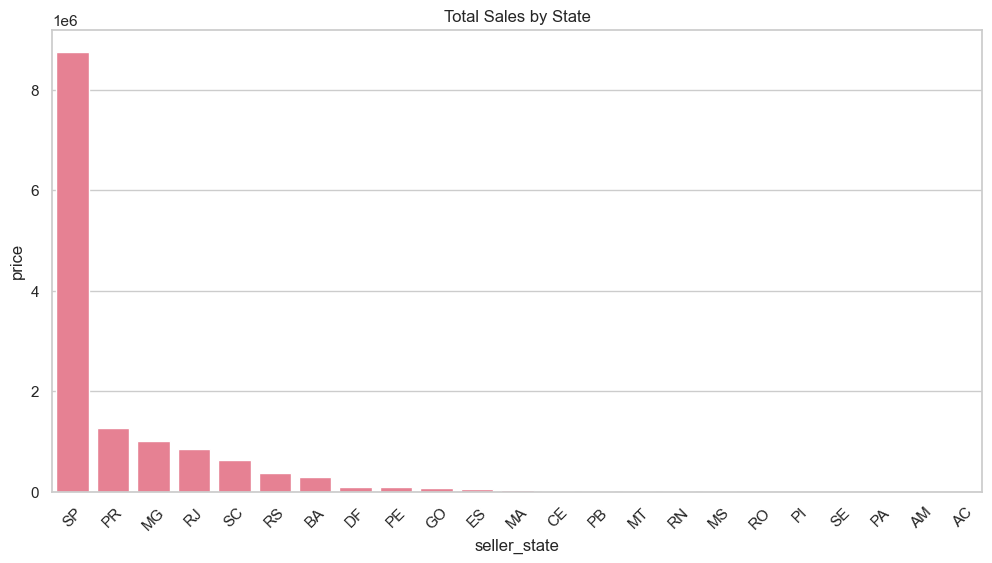

In [68]:
# Univariate Analysis for Numerical Variables
def numerical_univariate_analysis(df, numerical_columns):
    """Perform univariate analysis for numerical columns"""
    
    for col in numerical_columns:
        plt.figure(figsize=(12, 4))
        
        # Distribution plot
        plt.subplot(1, 2, 1)
        sns.histplot(data=df, x=col, kde=True)
        plt.title(f'Distribution of {col}')
        
        # Box plot
        plt.subplot(1, 2, 2)
        sns.boxplot(data=df, y=col)
        plt.title(f'Boxplot of {col}')
        
        plt.tight_layout()
        plt.show()
        
        # Print descriptive statistics
        print(f"\nDescriptive Statistics for {col}:")
        print(df[col].describe())
        print("\n" + "="*50)

# Univariate Analysis for Categorical Variables
def categorical_univariate_analysis(df, categorical_columns):
    """Perform univariate analysis for categorical columns"""
    
    for col in categorical_columns:
        plt.figure(figsize=(10, 5))
        
        # Count plot
        value_counts = df[col].value_counts()
        sns.barplot(x=value_counts.index, y=value_counts.values)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()
        
        # Print frequency statistics
        print(f"\nFrequency Distribution for {col}:")
        print(df[col].value_counts(normalize=True))
        print("\n" + "="*50)

# Bivariate Analysis
def bivariate_analysis(df, numerical_col1, numerical_col2):
    """Perform bivariate analysis between two numerical columns"""
    
    plt.figure(figsize=(10, 6))
    
    # Scatter plot
    sns.scatterplot(data=df, x=numerical_col1, y=numerical_col2)
    plt.title(f'Relationship between {numerical_col1} and {numerical_col2}')
    
    # Calculate correlation
    correlation = df[numerical_col1].corr(df[numerical_col2])
    plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', 
             transform=plt.gca().transAxes)
    
    plt.tight_layout()
    plt.show()

# Time Series Analysis
def time_series_analysis(df, date_column, value_column):
    """Perform time series analysis"""
    
    # Convert to datetime if needed
    df[date_column] = pd.to_datetime(df[date_column])
    
    # Group by date and calculate mean
    daily_data = df.groupby(df[date_column].dt.date)[value_column].mean()
    
    plt.figure(figsize=(15, 6))
    plt.plot(daily_data.index, daily_data.values)
    plt.title(f'Time Series Analysis of {value_column}')
    plt.xlabel('Date')
    plt.ylabel(value_column)
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

# Correlation Matrix
def correlation_matrix(df, numerical_columns):
    """Create correlation matrix for numerical columns"""
    
    plt.figure(figsize=(12, 8))
    correlation = df[numerical_columns].corr()
    
    sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')
    
    plt.tight_layout()
    plt.show()

# Main analysis function
def perform_complete_eda(products_df, orders_df, reviews_df, sellers_df, order_items_df):
    """Perform complete EDA on all datasets"""
    
    print("1. Products Analysis")
    print("="*50)
    
    # Numerical columns for products
    product_numerical = ['product_name_lenght', 'product_description_lenght', 
                        'product_photos_qty', 'product_weight_g', 
                        'product_length_cm', 'product_height_cm', 'product_width_cm']
    
    numerical_univariate_analysis(products_df, product_numerical)
    correlation_matrix(products_df, product_numerical)
    
    print("\n2. Orders Analysis")
    print("="*50)
    
    # Convert datetime columns
    datetime_cols = ['order_purchase_timestamp', 'order_approved_at',
                    'order_delivered_carrier_date', 'order_delivered_customer_date']
    
    for col in datetime_cols:
        orders_df[col] = pd.to_datetime(orders_df[col])
    
    # Order status analysis
    categorical_univariate_analysis(orders_df, ['order_status'])
    
    # Delivery time analysis
    orders_df['delivery_time'] = (orders_df['order_delivered_customer_date'] - 
                                 orders_df['order_purchase_timestamp']).dt.days
    
    time_series_analysis(orders_df, 'order_purchase_timestamp', 'delivery_time')
    
    print("\n3. Reviews Analysis")
    print("="*50)
    
    numerical_univariate_analysis(reviews_df, ['review_score'])
    
    print("\n4. Order Items Analysis")
    print("="*50)
    
    # Price and freight analysis
    numerical_univariate_analysis(order_items_df, ['price', 'freight_value'])
    bivariate_analysis(order_items_df, 'price', 'freight_value')
    
    # Time series of sales
    time_series_analysis(order_items_df, 'shipping_limit_date', 'price')
    
    print("\n5. Sellers Analysis")
    print("="*50)
    
    # Seller location analysis
    categorical_univariate_analysis(sellers_df, ['seller_state'])

perform_complete_eda(products_df, orders_df, order_reviews_df, sellers_df, order_items_df)

# Additional Analysis Functions

def analyze_customer_behavior(orders_df, reviews_df):
    """Analyze customer purchasing and review behavior"""
    
    # Merge orders and reviews
    customer_behavior = pd.merge(orders_df, reviews_df, on='order_id')
    
    # Analysis of purchase frequency
    purchase_frequency = customer_behavior.groupby('customer_id').size()
    
    plt.figure(figsize=(10, 6))
    sns.histplot(purchase_frequency, bins=30)
    plt.title('Distribution of Customer Purchase Frequency')
    plt.xlabel('Number of Orders')
    plt.ylabel('Count')
    plt.show()
    
    # Analysis of review patterns
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=customer_behavior, x='order_status', y='review_score')
    plt.title('Review Scores by Order Status')
    plt.xticks(rotation=45)
    plt.show()

def analyze_product_performance(order_items_df, products_df):
    """Analyze product sales and performance"""
    
    # Merge order items and products
    product_performance = pd.merge(order_items_df, products_df, on='product_id')
    
    # Top selling products
    top_products = product_performance.groupby('product_category_name')\
        .agg({
            'order_item_id': 'count',
            'price': 'mean'
        }).sort_values('order_item_id', ascending=False)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(data=top_products.head(10), x=top_products.head(10).index, 
                y='order_item_id')
    plt.title('Top 10 Product Categories by Sales')
    plt.xticks(rotation=45)
    plt.show()

def analyze_geographical_patterns(customers_df, sellers_df, order_items_df):
    """Analyze geographical patterns in sales"""
    
    # Merge relevant dataframes
    geo_analysis = pd.merge(order_items_df, sellers_df, on='seller_id')
    
    # Sales by state
    state_sales = geo_analysis.groupby('seller_state')\
        .agg({
            'order_id': 'count',
            'price': 'sum'
        }).sort_values('price', ascending=False)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(data=state_sales, x=state_sales.index, y='price')
    plt.title('Total Sales by State')
    plt.xticks(rotation=45)
    plt.show()

analyze_customer_behavior(orders_df, order_reviews_df)
analyze_product_performance(order_items_df, products_df)
analyze_geographical_patterns(customers_df, sellers_df, order_items_df)

## Visualization & Explanatory Analysis

### Pertanyaan 1:

C:\Users\AHMAD ZAKI\AppData\Local\Temp\ipykernel_117208\46477769.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


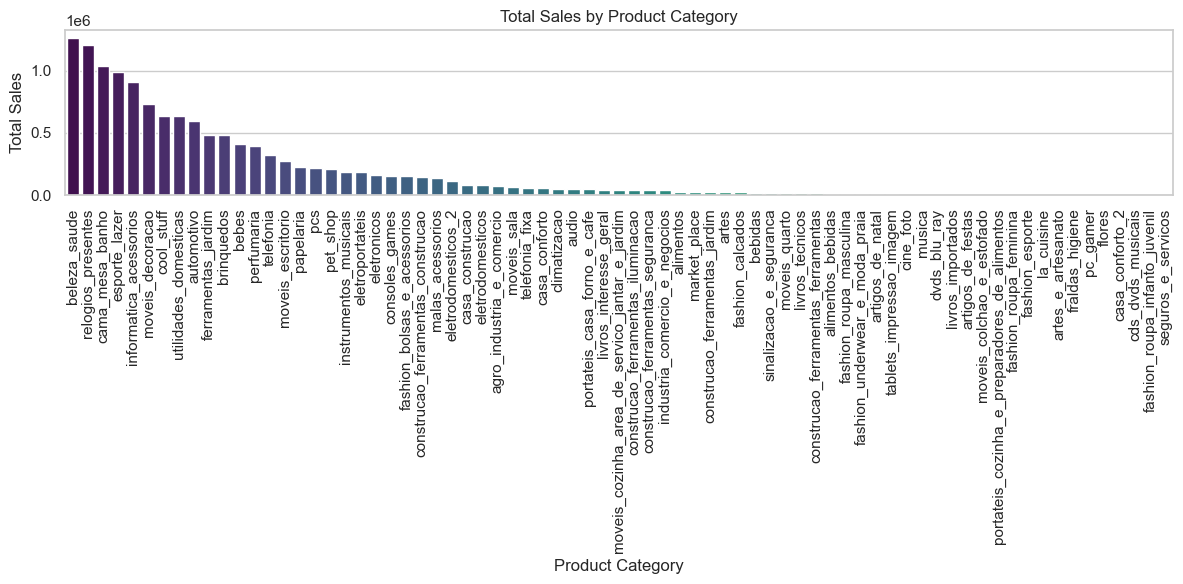

C:\Users\AHMAD ZAKI\AppData\Local\Temp\ipykernel_117208\46477769.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


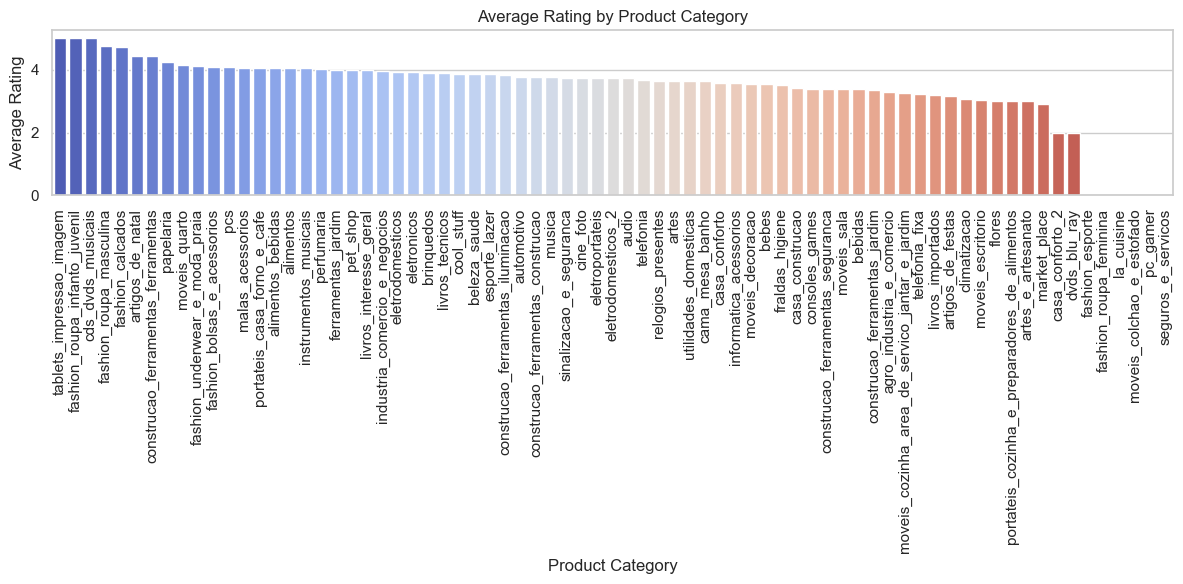

In [69]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=category_performance.sort_values(by='total_sales', ascending=False),
    x='product_category_name', y='total_sales', palette='viridis'
)
plt.xticks(rotation=90)
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=category_performance.sort_values(by='average_rating', ascending=False),
    x='product_category_name', y='average_rating', palette='coolwarm'
)
plt.xticks(rotation=90)
plt.title('Average Rating by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()

**Insight:**
- Kategori dengan Penjualan Tinggi: Kategori seperti "beleza_saude" dan "relogios_presentes" memiliki penjualan total tertinggi, menandakan popularitas yang signifikan di pasar.
- Rata-rata Rating Tinggi: Kategori seperti "tablets_impressao_imagem" dan "fashion_roupa_infantil" menunjukkan kualitas produk yang sangat baik berdasarkan rating pelanggan.


### Pertanyaan 2:

C:\Users\AHMAD ZAKI\AppData\Local\Temp\ipykernel_117208\2144917873.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


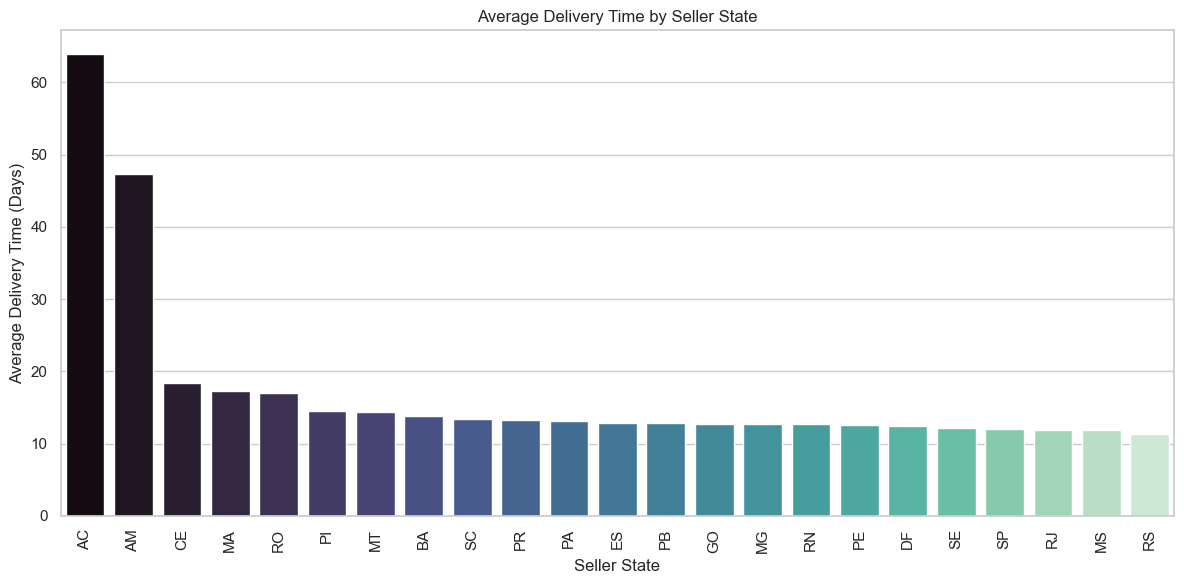

In [70]:
# Merge sellers data with orders
logistics_df = order_items_df.merge(orders_df[['order_id', 'order_delivered_customer_date', 'order_purchase_timestamp']], on='order_id')
logistics_df = logistics_df.merge(sellers_df[['seller_id', 'seller_state']], on='seller_id', how='left')

logistics_df['delivery_time_days'] = (
    logistics_df['order_delivered_customer_date'] - logistics_df['order_purchase_timestamp']
).dt.days

state_delivery_performance = logistics_df.groupby('seller_state').agg(
    average_delivery_time=('delivery_time_days', 'mean'),
    total_orders=('order_id', 'count')
).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=state_delivery_performance.sort_values(by='average_delivery_time', ascending=False),
    x='seller_state', y='average_delivery_time', palette='mako'
)
plt.xticks(rotation=90)
plt.title('Average Delivery Time by Seller State')
plt.xlabel('Seller State')
plt.ylabel('Average Delivery Time (Days)')
plt.tight_layout()
plt.show()

**Insight:**
- Negara bagian AC dan AM memiliki waktu pengiriman rata-rata tertinggi, menunjukkan tantangan logistik yang signifikan untuk daerah-daerah tersebut.
- Negara bagian seperti SP dan RS memiliki waktu pengiriman rata-rata yang jauh lebih rendah, menunjukkan efisiensi logistik yang lebih baik di daerah ini.

## Analisis Lanjutan (Opsional)

In [71]:
from datetime import timedelta

rfm_df = orders_df.merge(order_items_df, on='order_id')
rfm_df = rfm_df.merge(customers_df, on='customer_id')
rfm_df['order_purchase_timestamp'] = pd.to_datetime(rfm_df['order_purchase_timestamp'])

# Calculate Recency, Frequency, and Monetary
reference_date = rfm_df['order_purchase_timestamp'].max() + timedelta(days=1)
rfm_table = rfm_df.groupby('customer_unique_id').agg(
    Recency=('order_purchase_timestamp', lambda x: (reference_date - x.max()).days),
    Frequency=('order_id', 'nunique'),
    Monetary=('price', 'sum')
).reset_index()

rfm_table.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90
2,0000f46a3911fa3c0805444483337064,542,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00


**Insight:**
- Recency: Pelanggan dengan nilai Recency lebih rendah (misalnya, 116 atau 119) baru-baru ini melakukan transaksi. Mereka berpotensi untuk ditargetkan dalam strategi promosi agar tetap aktif berbelanja.

- Frequency & Monetary: Semua pelanggan dalam contoh ini memiliki Frequency 1, yang berarti mereka baru membeli satu kali. Pelanggan dengan Monetary tinggi, seperti ID 0004aac84e0df4da2b147fca70cf8255 dengan total pembelanjaan 180.00, dapat diprioritaskan untuk kampanye peningkatan frekuensi pembelian agar menjadi pelanggan tetap.

## Conclusion

- **Pertanyaan 1**: Kategori beleza_saude dan relogios_presentes memiliki total penjualan tertinggi, menunjukkan tingginya permintaan untuk produk dalam kategori ini. Namun, kategori seperti tablets_impressao_imagem dan fashion_roupa_infantil memiliki rata-rata rating tertinggi, menandakan kualitas produk yang sangat dihargai oleh pelanggan. Strategi pemasaran dapat ditingkatkan untuk kategori dengan penjualan tinggi, sementara kategori dengan rating tinggi dapat digunakan untuk membangun reputasi merek yang lebih baik.
- **Pertanyaan 2**: Lokasi penjual sangat memengaruhi waktu pengiriman, dengan wilayah seperti AC dan AM mencatat waktu pengiriman rata-rata yang tinggi, hingga lebih dari 60 hari, yang kemungkinan dipengaruhi oleh tantangan geografis dan logistik. Sebaliknya, wilayah seperti SP dan RS menunjukkan waktu pengiriman yang lebih cepat, mencerminkan efisiensi logistik yang baik. Untuk meningkatkan pengalaman pelanggan dan efisiensi distribusi, perusahaan perlu fokus pada optimalisasi logistik di wilayah dengan waktu pengiriman yang tinggi dan memperkuat jaringan distribusi mereka.